In [1]:
import pystac_client
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from itertools import compress
import pandas as pd

# opening STAC catalog

catalog = pystac_client.Client.open(
    #"https://storage.googleapis.com/dgds-data-public/coclico/coclico-stac/catalog.json" # cloud API
    r"p:\1000545-054-globalbeaches\15_GlobalCoastalAtlas\coclicodata\current\catalog.json" # P drive API 
)
#catalog

In [2]:
href = catalog.get_child("sed_class").assets["data"].href
ds = xr.open_zarr(href)

In [3]:
label_dict = {0: 'sand', 1 : 'mud', 2: 'cliff', 3: 'vegetated', 4: 'other'}
colors = {'cliff': 'dimgrey', 'sand': 'goldenrod', 'mud': 'saddlebrown', 'vegetated': 'forestgreen', 'other': 'darkgrey'}

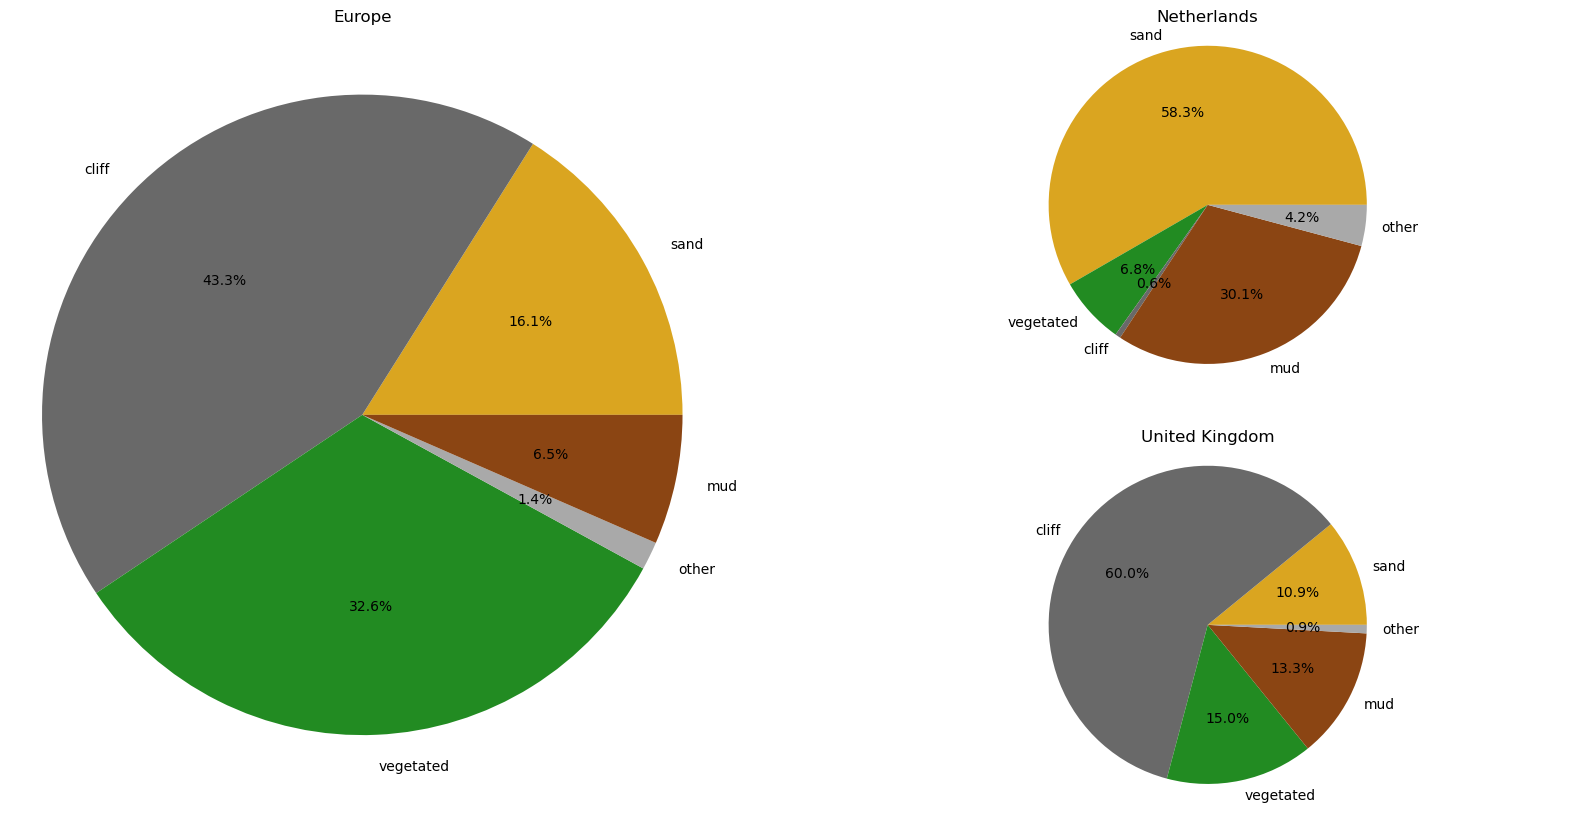

In [11]:
import matplotlib.pyplot as plt
from collections import Counter

continent = b'Europe'
indices = np.where(ds['continent'].values == continent)[0]
europe_sed = [label_dict[x] for x in ds.isel(stations=indices)["sediment_label"].values.astype(int)]
c_lst = dict(Counter(europe_sed))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = c_lst.keys()
sizes = c_lst.values()

fig = plt.figure(figsize=(20, 10))
ax1 = plt.subplot2grid((2, 2), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax3 = plt.subplot2grid((2, 2), (1, 1))

ax1.pie(sizes, labels=labels , colors=[colors[label] for label in labels], autopct='%1.1f%%',)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title(continent.decode("utf-8"))

country_axes = [ax2, ax3]
countries = [b'Netherlands', b'United Kingdom']
for i, count in enumerate(countries):
    indices = np.where(ds['country'].values == count)[0]
    europe_sed = [label_dict[x] for x in ds.isel(stations=indices)["sediment_label"].values.astype(int)]
    c_lst = dict(Counter(europe_sed))

    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = c_lst.keys()
    sizes = c_lst.values()
    country_axes[i].pie(sizes, labels=labels , colors=[colors[label] for label in labels], autopct='%1.1f%%',)
    country_axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    country_axes[i].set_title(count.decode("utf-8"))

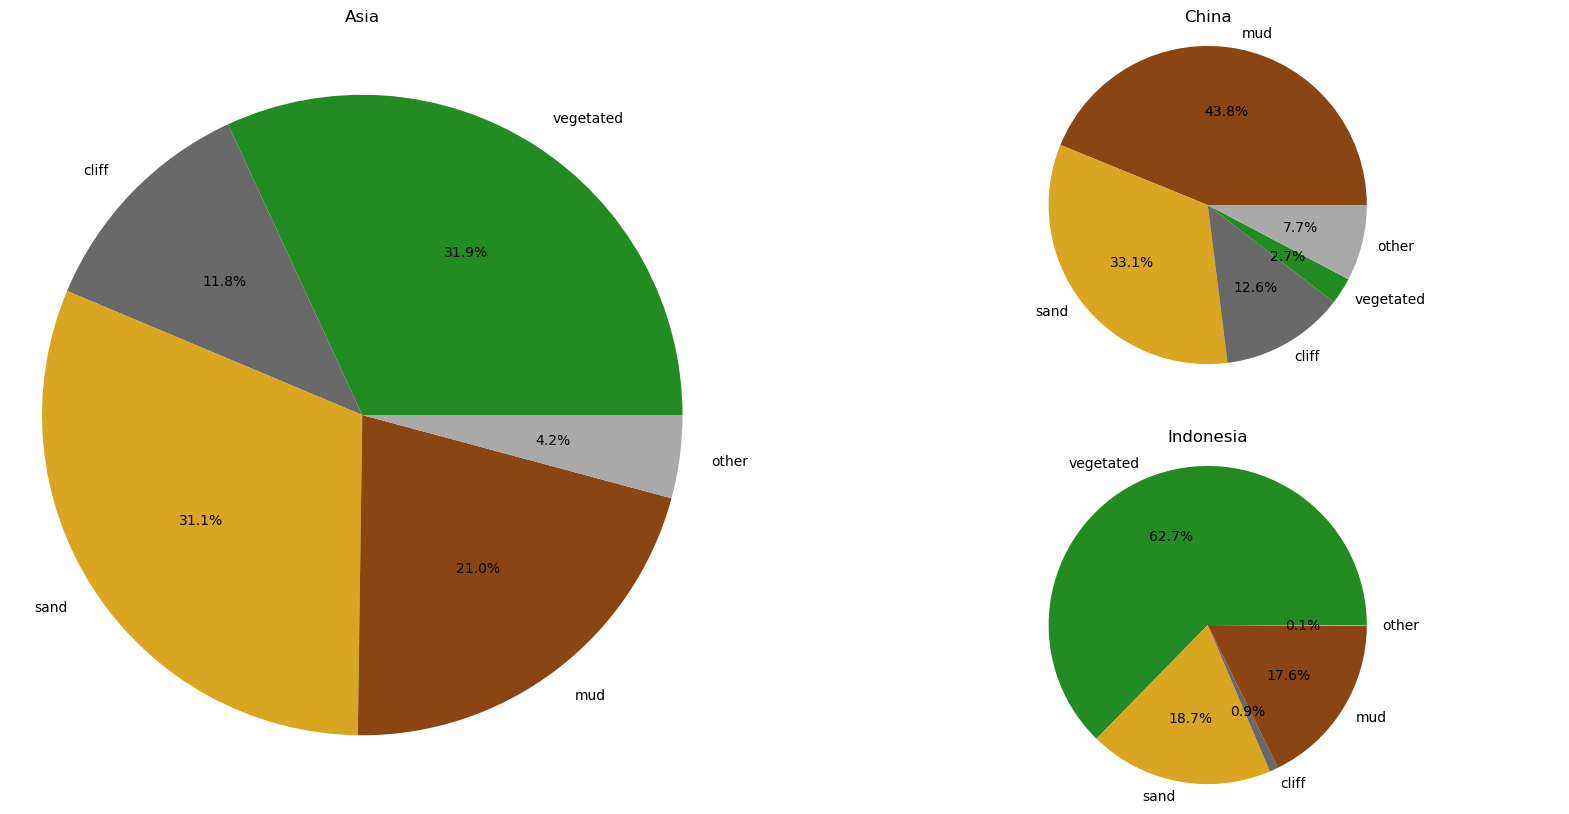

In [12]:
import matplotlib.pyplot as plt
from collections import Counter

continent = b'Asia'
indices = np.where(ds['continent'].values == continent)[0]
europe_sed = [label_dict[x] for x in ds.isel(stations=indices)["sediment_label"].values.astype(int)]
c_lst = dict(Counter(europe_sed))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = c_lst.keys()
sizes = c_lst.values()

fig = plt.figure(figsize=(20, 10))
ax1 = plt.subplot2grid((2, 2), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax3 = plt.subplot2grid((2, 2), (1, 1))

ax1.pie(sizes, labels=labels , colors=[colors[label] for label in labels], autopct='%1.1f%%',)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title(continent.decode("utf-8"))

country_axes = [ax2, ax3]
countries = [b'China', b'Indonesia']
for i, count in enumerate(countries):
    indices = np.where(ds['country'].values == count)[0]
    europe_sed = [label_dict[x] for x in ds.isel(stations=indices)["sediment_label"].values.astype(int)]
    c_lst = dict(Counter(europe_sed))

    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = c_lst.keys()
    sizes = c_lst.values()
    country_axes[i].pie(sizes, labels=labels , colors=[colors[label] for label in labels], autopct='%1.1f%%',)
    country_axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    country_axes[i].set_title(count.decode("utf-8"))